In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Excercise 1 -  Divergence problem

##### Variant A

In [4]:
model = CmdStanModel(stan_file='stan1.stan')

INFO:cmdstanpy:compiling stan file /home/szut/DA/lab3/stan1.stan to exe file /home/szut/DA/lab3/stan1
INFO:cmdstanpy:compiled model executable: /home/szut/DA/lab3/stan1


In [10]:
result = model.sample(data={'N':1, 'y':[1]}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [11]:
print(result.diagnose())

Processing csv files: /tmp/tmpc938h65r/stan1-20220315095354_1.csv, /tmp/tmpc938h65r/stan1-20220315095354_2.csv, /tmp/tmpc938h65r/stan1-20220315095354_3.csv, /tmp/tmpc938h65r/stan1-20220315095354_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
250 of 4000 (6.25%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



In [12]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
#Calculating log sigma
post = arviz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

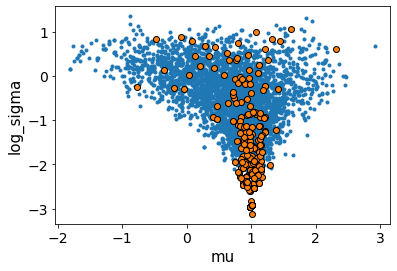

In [13]:
#Arviz plot
az.plot_pair(arviz_result, var_names=['mu', 'log_sigma'], divergences=True)

##### Variant B

In [14]:
model = CmdStanModel(stan_file='stan1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [15]:
result = model.sample(data={'N':5, 'y':[1.05, 0.87, -0.49, -0.22, 0.18]}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status

chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed

INFO:cmdstanpy:CmdStan done processing.


In [16]:
print(result.diagnose())

Processing csv files: /tmp/tmpc938h65r/stan1-20220315095427_1.csv, /tmp/tmpc938h65r/stan1-20220315095427_2.csv, /tmp/tmpc938h65r/stan1-20220315095427_3.csv, /tmp/tmpc938h65r/stan1-20220315095427_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
2 of 4000 (0.05%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



In [17]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
#Calculating log sigma
post = arviz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

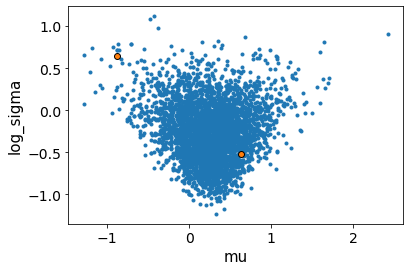

In [18]:
#Arviz plot
az.plot_pair(arviz_result, var_names=['mu', 'log_sigma'], divergences=True)

## Excercise 2 - Binominial example

In [29]:
#Data read fromm coin.csv
#y = 
#N = 
data = pd.read_csv("coin.csv")
N = len(data.index)
y = data['Toss_Result']

In [30]:
model = CmdStanModel(stan_file='stan2.stan')
result = model.sample(data={"N" : N, "y" : y}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████▍    | 00:00 Iteration: 1000 / 2000 [ 50%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [31]:
result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-290.00,0.01900,0.720,-290.00,-290.00,-290.0,1500.0,10000.0,1.0
theta,0.46,0.00062,0.024,0.42,0.46,0.5,1500.0,11000.0,1.0


In [32]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

array([[<AxesSubplot:title={'center':'theta'}>]], dtype=object)

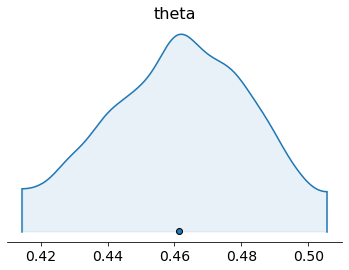

In [33]:
#Plot
az.plot_density(arviz_result,shade=0.1)

## Excercise 3 - Predictive checks


In [34]:
#Data read from normal.csv
#y = 
#N =
data = pd.read_csv("normal.csv")
N = len(data.index)
y = data['value']

#### Posterior predictive

In [36]:
model = CmdStanModel(stan_file='stan3.stan')

INFO:cmdstanpy:compiling stan file /home/szut/DA/lab3/stan3.stan to exe file /home/szut/DA/lab3/stan3
INFO:cmdstanpy:compiled model executable: /home/szut/DA/lab3/stan3


In [37]:
result = model.sample(data={'N':N, 'y':y}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)







chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [38]:
result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-53.0000,0.0250,1.100,-55.00,-53.0000,-52.00,1700.0,1500.0,1.0
mu,-0.0350,0.0020,0.110,-0.21,-0.0340,0.14,2800.0,2300.0,1.0
sigma,1.0000,0.0013,0.073,0.91,1.0000,1.20,3100.0,2600.0,1.0
y_rep[1],-0.0290,0.0160,1.000,-1.70,-0.0360,1.70,4259.0,3561.0,1.0
y_rep[2],-0.0530,0.0160,1.000,-1.70,-0.0710,1.70,4170.0,3486.0,1.0
...,...,...,...,...,...,...,...,...,...
y_rep[96],-0.0330,0.0170,1.000,-1.70,-0.0340,1.60,3868.0,3234.0,1.0
y_rep[97],-0.0520,0.0170,1.000,-1.80,-0.0610,1.70,3928.0,3285.0,1.0
y_rep[98],-0.0080,0.0170,1.000,-1.70,-0.0180,1.70,3928.0,3284.0,1.0


In [39]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result,
    posterior_predictive=["y_rep"], 
    observed_data={"y": y},
)
arviz_result

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<AxesSubplot:xlabel='y / y_rep'>

/home/szut/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


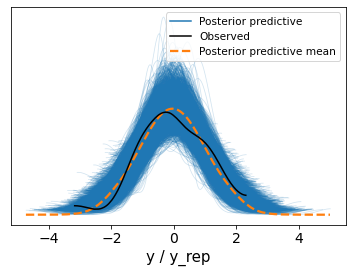

In [40]:
#Arviz plot
az.plot_ppc(arviz_result,data_pairs={"y": "y_rep"})

#### Prior predictive

In [41]:
model = CmdStanModel(stan_file='stan4.stan')

INFO:cmdstanpy:compiling stan file /home/szut/DA/lab3/stan4.stan to exe file /home/szut/DA/lab3/stan4
INFO:cmdstanpy:compiled model executable: /home/szut/DA/lab3/stan4
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/szut/DA/lab3/stan4.hpp /home/szut/DA/lab3/stan4.stan
Warning in '/home/szut/DA/lab3/stan4.stan', line 7, column 25: Use of the
    `abs` function with real-valued arguments is deprecated; use function
    `fabs` instead.

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials_6.0.0/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wno-ignored-attributes   -x c++ -o /home/szut/DA/lab3/stan4.o /home

In [42]:
result = model.sample(data={'N':100}, 
                            chains = 1,
                            fixed_param=True,
                            seed = 523833
                            )

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [43]:
result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.0000,NaN,0.0,0.000,0.0000,0.0,NaN,NaN,NaN
mu,-0.0220,0.031,1.0,-1.700,-0.0150,1.6,1100.0,10000.0,1.0
sigma,0.7900,0.019,0.6,0.041,0.6700,1.9,1000.0,9700.0,1.0
y_prior[1],-0.0540,0.042,1.4,-2.300,-0.0740,2.3,1126.0,10832.0,1.0
y_prior[2],0.0360,0.045,1.4,-2.100,-0.0077,2.4,1003.0,9646.0,1.0
...,...,...,...,...,...,...,...,...,...
y_prior[96],-0.0490,0.042,1.3,-2.200,-0.0060,2.0,1045.0,10046.0,1.0
y_prior[97],0.0027,0.050,1.4,-2.100,0.0300,2.2,770.0,7403.0,1.0
y_prior[98],-0.0190,0.041,1.4,-2.100,-0.0500,2.3,1178.0,11327.0,1.0


In [44]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    prior=result,
    prior_predictive=["y_prior"],
    observed_data={"y": y}
)
arviz_result

Inference data with groups:
	> prior
	> prior_predictive
	> sample_stats_prior
	> observed_data

<AxesSubplot:xlabel='y / y_prior'>

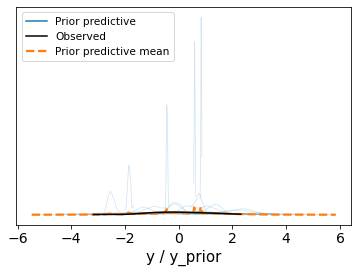

In [45]:
az.plot_ppc(arviz_result, group="prior", data_pairs={"y": "y_prior"}, num_pp_samples=30)

In [ ]:
#Draw y_prior histogram
#...